<a href="https://colab.research.google.com/github/paulxdillon/Chem-Eng/blob/master/CounterCurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Counter current flow using numpy ...

In [0]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [0]:
mh  = 2             # kg/s
Cph = 4200          # J/kg.K
mc  = 1
Cpc = 4200
hHot    = 2000      #W/m2.K
hCold   = 800
AHt     = 5.0       # m2
ThIN    = 130       # C
TcIN    = 70
numPts  = 20        # number of collocation points

In [0]:
def fun_HX(x, T):
    return np.vstack((
        hHot/(mc*Cpc)*( T[1] - T[0] ),  # evaluate the difference between the temperature of the hot
                                        # stream on the left and the required boundary condition
        hCold/(mh*Cph)*( T[1] -T[0] )   # evaluate the difference between the temperature of the cold
                                        # stream on the right and the required boundary condition
    ))

In [0]:
def bc_HX(Ta, Tb):
    return np.array( [Ta[0] - ThIN , Tb[1]-TcIN] )

In [10]:
A_HX = np.linspace(0, AHt, numPts)
T_HX = np.full((2, A_HX.shape[0]), (ThIN + TcIN)/2 )    # initial guess based on average of hot-inlet
                                                        # and cold-inlet

res_HX = solve_bvp(fun_HX, bc_HX, A_HX, T_HX, verbose=2) # solve using "solve_bvp"

A_HX_plot = np.linspace(0, AHt, numPts)
T_HX_plot = res_HX.sol(A_HX_plot)                       # generate temperatures from solution
                                                        # at desired values of h.t. area

ThOUT = T_HX_plot[0,-1]
TcOUT = T_HX_plot[1,0]

print("Cold exit temperature: {:8.2f}C".format( TcOUT ))
print("Hot exit temperature:  {:8.2f}C".format( ThOUT  ))

LMTD = ((ThIN-TcOUT)-(ThOUT-TcIN))/np.log( np.absolute( (ThIN-TcOUT)/(ThOUT-TcIN) ) )
print("LMTD = {:8.2f}C".format( LMTD ) )

   Iteration    Max residual    Total nodes    Nodes added  
       1          7.30e-06          20              0       
Solved in 1 iterations, number of nodes 20, maximum relative residual 7.30e-06.
Cold exit temperature:    80.53C
Hot exit temperature:     77.36C
LMTD =    22.11C


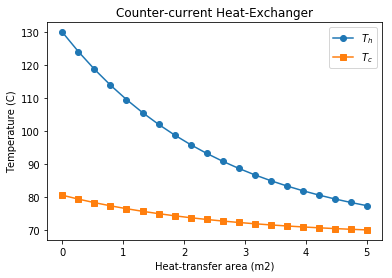

In [11]:
plt.plot(A_HX_plot, T_HX_plot[0], label='$T_h$', marker="o")
plt.plot(A_HX_plot, T_HX_plot[1], label='$T_c$', marker="s")
plt.title("Counter-current Heat-Exchanger")
plt.xlabel("Heat-transfer area (m2)")
plt.ylabel("Temperature (C)")
plt.legend(loc='upper right')
plt.show()